# Predict House Prices in Ames, Iowa 🏡
**Problem Statement**:  
The Ames Housing dataset is a comprehensive dataset that provides detailed information on nearly 3,000 properties in Ames, Iowa. Your goal is to build a **linear regression model** to predict house prices based on a rich set of features.

---

## Key Challenges
1. **High Dimensionality** 📊:  
   The dataset contains over **80 features**, including both numeric and categorical data. Managing such a large feature set requires careful feature selection and preprocessing.

2. **Feature Engineering** 🔧:  
   Some features, such as the year built or square footage, might be more meaningful when combined or transformed. For example:
   - **House Age**: Calculate the age of the house from the year built.
   - **Total Living Area**: Combine main floor and basement square footage for more accurate predictions.

3. **Missing Values** ❓:  
   Several features have missing data, which must be handled through strategies like **imputation** or **dropping** irrelevant columns.

4. **Outliers** 🚨:  
   Outliers, such as very expensive or large homes, can distort linear regression results. Identifying and treating these outliers is key for improving model performance.

5. **Multicollinearity** 🔄:  
   Some features may be highly correlated with each other, leading to **multicollinearity**. This can reduce the effectiveness of our model, so we will need to analyze and address this issue carefully.

---

## Approach

We will follow these key steps to solve the problem:

1. **Data Exploration and Cleaning** 🧹:  
   Examine and clean the dataset by dealing with missing values, outliers, and inconsistent data.

2. **Feature Engineering** ✨:  
   Create new features that better represent the underlying property value drivers, such as house age or total square footage.

3. **Handling Categorical Features** 🏷️:  
   Convert categorical variables into numerical representations through one-hot encoding to make them usable for linear regression.

4. **Multicollinearity Check** 🧐:  
   Assess and reduce multicollinearity between features using techniques like variance inflation factor (VIF) analysis.

5. **Model Training and Evaluation** 📈:  
   Train a **linear regression model** and evaluate its performance using metrics like **Mean Squared Error (MSE)** and **R²**.

6. **Regularization** 🚀:  
   If necessary, apply **Ridge** or **Lasso** regression to prevent overfitting and handle multicollinearity.

---

Let's dive in and build an accurate, interpretable model that can effectively predict house prices in Ames, Iowa! 🌟


In [18]:
import pandas as pd
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Load the dataset
url = "https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv"
df = pd.read_csv(url)

# Display basic info about the data
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [19]:
# Drop the 'date' column
df = df.drop(columns=['date'])

In [20]:
# Check for missing values
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Understanding the Correlation Check

The piece of code is used to identify which features are most strongly correlated with the target variable (house prices). This analysis helps us understand the following:

1. **Which features are the best predictors of house prices**:
   - Features with a strong **positive correlation** (close to +1) with the target variable tend to be good predictors. For example, features like total square footage or number of bathrooms may have high positive correlations with price, indicating that larger homes or homes with more amenities tend to sell for higher prices.

2. **Which features have a negative impact on the price**:
   - Features with a **negative correlation** (closer to -1) indicate that as the feature value increases, the house price tends to decrease. For instance, if a feature like the distance from the city center is negatively correlated with price, it suggests that houses further from the city are generally cheaper.

3. **Which features are less relevant to predicting house prices**:
   - Features with a correlation close to **zero** have little to no linear relationship with the house price. These features may not provide much useful information for predicting house prices and could be considered for removal or further analysis.

---

By sorting the correlations in descending order, we can easily identify which features are the most influential in predicting house prices and which may have a weaker or even opposite effect.


In [22]:

# Check correlation with the target variable
corr = df.corr()
print(dict(corr['price'].sort_values(ascending=False)))
relevant_columns =  [x  for x,y in dict(corr['price'].sort_values(ascending=False)).items() if (y>0.20)]

{'price': 1.0, 'sqft_living': 0.7020350546118005, 'grade': 0.6674342560202353, 'sqft_above': 0.6055672983560784, 'sqft_living15': 0.5853789035795692, 'bathrooms': 0.5251375054139628, 'view': 0.39729348829450273, 'sqft_basement': 0.3238160207119844, 'bedrooms': 0.30834959814563934, 'lat': 0.3070034799952544, 'waterfront': 0.26636943403060204, 'floors': 0.25679388755071897, 'yr_renovated': 0.1264337934408933, 'sqft_lot': 0.0896608605871003, 'sqft_lot15': 0.08244715251948544, 'yr_built': 0.05401153149479249, 'condition': 0.03636178912899721, 'long': 0.021626241039337152, 'id': -0.016762196614444884, 'zipcode': -0.05320285429829216}


In [23]:
# Count the number of unique zipcodes in the dataset
df = df.dropna()
num_zipcodes = df['zipcode'].nunique()
print(f"There are {num_zipcodes} unique zipcodes in the dataset.")

There are 70 unique zipcodes in the dataset.


In [24]:
# Extract features for clustering
features = df[['zipcode', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors']]

# Normalize/Standardize features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


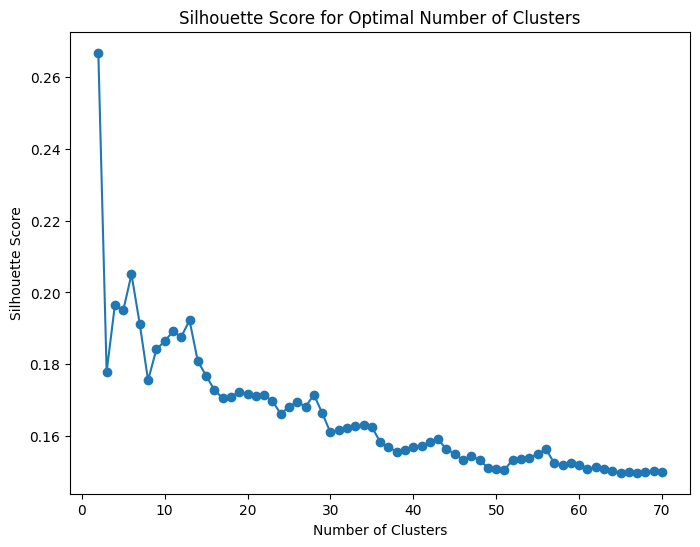

In [32]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
# Compute silhouette scores for a range of cluster numbers
silhouette_scores = []
k_range = range(2, 71)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, clusters)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()


#6 looks very optimal cluster size, we will go with 6

In [33]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=6, random_state=42)  # Adjust the number of clusters as needed
df['zipcode_cluster'] = kmeans.fit_predict(scaled_features)

In [35]:
# Initialize dictionaries to store results
results = {}

# Loop through each cluster
for cluster in df['zipcode_cluster'].unique():
    print(f"Processing cluster {cluster}")

    # Filter data for the current cluster
    cluster_data = df[df['zipcode_cluster'] == cluster]
    
    # Select features and target variable
    X = cluster_data[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors']]
    y = cluster_data['price']
    
    # Convert categorical features to dummy variables if needed
    X = pd.get_dummies(X, drop_first=True)
    
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[cluster] = {'MSE': mse, 'R^2': r2}
    
    print(f"Cluster {cluster}: Mean Squared Error = {mse}, R^2 Score = {r2}")


Processing cluster 2
Cluster 2: Mean Squared Error = 11940844326.488586, R^2 Score = 0.45406854729983015
Processing cluster 0
Cluster 0: Mean Squared Error = 17430850752.921528, R^2 Score = 0.5070048210954217
Processing cluster 3
Cluster 3: Mean Squared Error = 24825966486.55864, R^2 Score = 0.4807536440205662
Processing cluster 4
Cluster 4: Mean Squared Error = 125211205388.35078, R^2 Score = 0.4298382267059081
Processing cluster 1
Cluster 1: Mean Squared Error = 100297337361.95828, R^2 Score = 0.5496801890112647
Processing cluster 5
Cluster 5: Mean Squared Error = 97940196293.27147, R^2 Score = 0.848799472224415


# Train without clustering

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv"
df = pd.read_csv(url)

# Select features and target
features = df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'waterfront', 'floors']]
target = df['price']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 51184595501.80478
R^2 Score: 0.6614253958980159


# Train without clustering and with less features

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv"
df = pd.read_csv(url)

# Select features and target
features = df[['sqft_living', 'grade', 'sqft_above', 'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat', 'floors']]
target = df['price']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 54325909113.034454
R^2 Score: 0.6406463118424477


## Performance Comparison: With and Without Clustering

### Model Performance with Clustering

The performance of the linear regression model on different clusters is summarized below:

- **Cluster 5**:
  - **Mean Squared Error (MSE)**: 97,940,196,293.27
  - **R^2 Score**: 0.849
  - **Best Performance**: Cluster 5 shows the lowest MSE and highest R^2 score, indicating the best predictive performance among the clusters.

- **Cluster 1**:
  - **Mean Squared Error (MSE)**: 100,297,337,361.96
  - **R^2 Score**: 0.550
  - **Moderate Performance**: Cluster 1 has decent performance but is not as strong as Cluster 5.

- **Cluster 0**:
  - **Mean Squared Error (MSE)**: 17,430,850,752.92
  - **R^2 Score**: 0.507
  - **Moderate Performance**: Cluster 0 has a higher MSE and lower R^2 score compared to Clusters 1 and 5.

- **Cluster 2**:
  - **Mean Squared Error (MSE)**: 11,940,844,326.49
  - **R^2 Score**: 0.454
  - **Lower Performance**: Cluster 2 exhibits the lowest R^2 score and moderate MSE.

- **Cluster 3**:
  - **Mean Squared Error (MSE)**: 24,825,966,486.56
  - **R^2 Score**: 0.481
  - **Lower Performance**: Cluster 3 has relatively poor performance compared to others.

- **Cluster 4**:
  - **Mean Squared Error (MSE)**: 125,211,205,388.35
  - **R^2 Score**: 0.430
  - **Worst Performance**: Cluster 4 shows the highest MSE and lowest R^2 score, indicating the worst performance.

### Model Performance Without Clustering

The performance of the linear regression model trained on the entire dataset is as follows:

- **Mean Squared Error (MSE)**: 54,325,909,113.03
- **R^2 Score**: 0.641

### Comparison and Insights

1. **Model Performance**:
   - **Without Clustering**: Provides a baseline performance with an MSE of 54,325,909,113.03 and an R^2 score of 0.641.
   - **With Clustering**: The best performing cluster (Cluster 5) has an MSE of 97,940,196,293.27 and an R^2 score of 0.849. Despite a higher MSE, the R^2 score indicates better performance in explaining variance within that cluster.

2. **Cluster Performance**:
   - Clustering improves performance for some clusters, particularly Cluster 5, which shows significant improvements in R^2 score compared to the overall model.
   - However, clustering introduces variability, with some clusters performing worse than the overall model.

3. **Implications**:
   - **Clustering**: Can be beneficial for improving model performance in specific segments but may also introduce variability in accuracy.
   - **Overall Model**: The global model provides a solid baseline, with moderate R^2 score and MSE.

### Summary

Clustering can enhance model performance for certain data segments, as shown by the strong performance of Cluster 5. However, it also introduces variability, with some clusters performing worse than the overall model. Depending on the application, clustering might be a useful strategy for improving predictive accuracy for specific subsets of data, but a well-tuned global model remains competitive.
